## Statistic of random walk-generated graph context

In my master studies, I am interested in complex networks and their building blocks - motifs. Inspired by the skipgram NLP model and the adaptation to network DeepWalk, I think that if we use network motifs as a biased random walk pattern, we can generate a more expressive graph context in term of mesoscopic structure emphasis.

In [2]:
from sys import path
path.append('./../src/')  # import prototype modules
from constrains import R, UTriangle, UWedge
from walks import WalkGenerator
import networkx as nx
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt
import pickle
from collections import defaultdict as dd
import time
%matplotlib inline

data_root = './../data/'

## Amazon co-purchase network

In [3]:
amazon = pickle.load(open(data_root+'amazon.graph', 'rb'))
assert isinstance(amazon, nx.Graph)
assert amazon.size() == 925872

Random walk context (identical to DeepWalk) is generated by WalkGenerator with different constrains.

In [4]:
random_walker = WalkGenerator(graph=amazon, constrain=R())

We want to create a random context, each walk length is 80, there is 20000 walks in total.

In [33]:
def get_graph_context(random_walker, num_walk=20000, walk_length=80):
    """Return randomly generated graph context"""
    t0 = t1 = time.time()
    random_context = [i[:] for i in random_walker._gen(num_walk, walk_length)]
    node_count = dd(int)
    for node_list in random_context:
        for i in node_list:
            node_count[i] += 1
    sorted_ids = sorted(node_count,
                         key=lambda i: node_count[i],
                         reverse=True)
    t1 = time.time()
    print("Time elapsed: {}".format(t1-t0))
    return random_context, node_count, sorted_ids

amazon_random_context, amazon_random_node_count, amazon_sorted_ids = get_graph_context(random_walker)

`amazon_random_node_count` contains 263385 unique nodes over 1,600,000 nodes in random walk. Maximum node id is 110284 with 622 occurences.

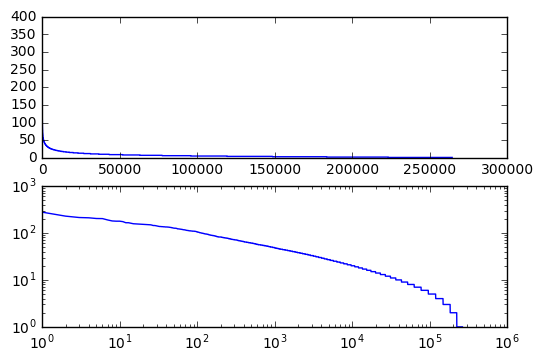

In [34]:
def plot_freq_dist(shorted_ids, node_count):
    fig, (ax, ax_log) = plt.subplots(2,1)
    x = np.arange(0, len(node_count), 1, dtype=int)
    y = [node_count[shorted_ids[i]] for i in x]
    ax.plot(x, y)
    ax_log.loglog(x, y)
    plt.show()
    
plot_freq_dist(amazon_sorted_ids, amazon_random_node_count)

In [35]:
triangle_walker = WalkGenerator(graph=amazon, constrain=UTriangle())
amazon_triangle_context, amazon_triangle_node_count, amazon_triangle_sorted_ids = get_graph_context(triangle_walker)

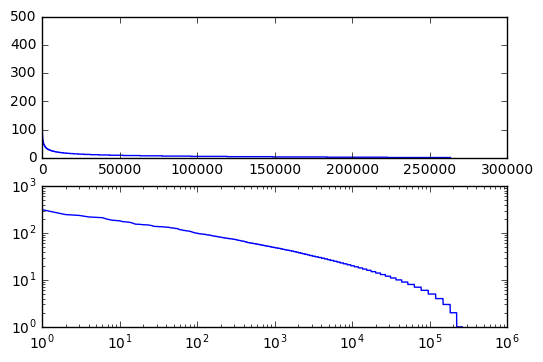

In [36]:
plot_freq_dist(amazon_triangle_sorted_ids, amazon_triangle_node_count)

In [37]:
amazon_triangle_sorted_ids[:10]

[110284, 125899, 106576, 139590, 219303, 58715, 169144, 199822, 155533, 180499]

In [38]:
amazon_sorted_ids[:10]

[110284, 125899, 139590, 266435, 239148, 199822, 234609, 331866, 176175, 58715]

## Cora citation network

In [39]:
cora = pickle.load(open(data_root+'cora.graph', 'rb'))

First I will try to plot the same walk statistic on undirected cora graph.

In [40]:
ucora = cora.to_undirected()  # Convert to undirected graph

In [41]:
random_ucora_walker = WalkGenerator(graph=ucora, constrain=R())

In [42]:
cora_random_context, cora_random_node_count, cora_sorted_ids = get_graph_context(random_ucora_walker)

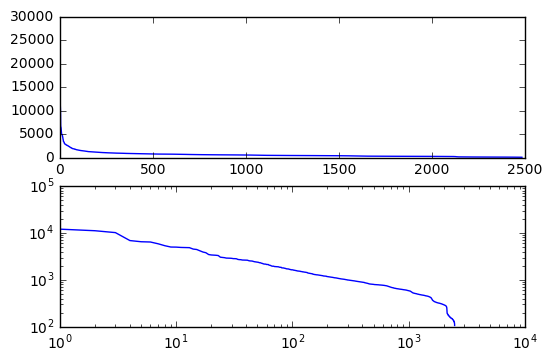

In [43]:
plot_freq_dist(cora_sorted_ids, cora_random_node_count)

In [44]:
triangle_ucora_walker = WalkGenerator(graph=ucora, constrain=UTriangle())

In [45]:
cora_triangle_context, cora_triangle_node_count, cora_triangle_sorted_ids = get_graph_context(triangle_ucora_walker)

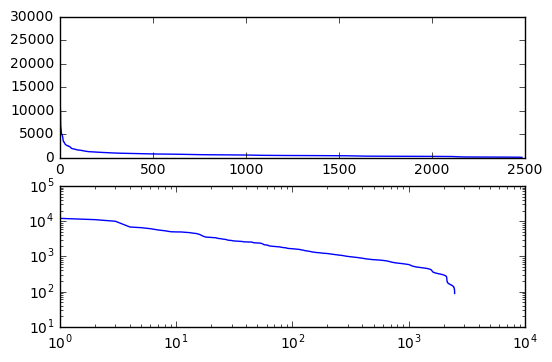

In [46]:
plot_freq_dist(cora_triangle_sorted_ids, cora_triangle_node_count)

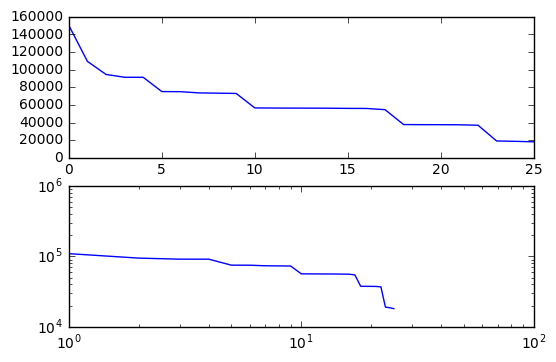

In [47]:
wedge_ucora_walker = WalkGenerator(graph=ucora, constrain=UWedge())
cora_wedge_context, cora_wedge_node_count, cora_wedge_sorted_ids = get_graph_context(wedge_ucora_walker)
plot_freq_dist(cora_wedge_sorted_ids, cora_wedge_node_count)